### Notebook by [Mingshan Mia Zhang](https://www.linkedin.com/in/mingshan-zhang-60259267/)

## Table of contents

1. [Introduction](#Introduction)

2. [Required libraries](#Required-libraries)

3. [Task2 Anomaly Detection](#Task2-Anomaly-Detection)

    - [Step 1: Checking the data](#Step-1:-Checking-the-data)

    - [Step 2: Tidying the data](#Step-2:-Tidying-the-data)
    
    - [Step 3: Exploratory Analysis](#Step-3:-Exploratory-Analysis)
    
    - [Step 4: Feature Engineering](#Step-4:-Feature-Engineering)
    
    - [Step 5: Modeling](#Step-5:-Modeling)
    
    - [Step 6: Findings](#Step-6:-Findings)
    
    
4. [Task3 Clustering & Customer Profiling](#Task3-Clustering-&-Customer-Profiling)

    -  [Step 1: Define Problem](#Step-1:-Define-Problem)
    
    -  [Step 2: Checking the data](#Step-2:-Checking-the-data)
    
    -  [Step 3: Modeling](#Step-3:-Modeling)
    
    -  [Step 4: Results Analysis & Findings](#Step-4:-Results-Analysis-&-Findings)

5. [Task5 Story Telling & Lesson Leart](#Task5-Story-Telling-&-Lesson-Leart)

6. [Future work](#Future-work)

## Introduction

[[ go back to the top ]](#Table-of-contents)

This data report is to analyze different metrics in a eCommerce platform. 

The metrics include:

    TRU - total registration User
    DAU - daily active user
    Items - Items bought 
    Trans - Transactions
    Items Per Trans - items bought per transaction
    Items per DAU - items bought per DAU
    Conversion - % of people bought any items 
    Cash flow - existing credits in user account
    Return Customer - Number of player returned 
    Time Spend Per Day(seconds) - Time Spend in platform 

## Required-libraries

[[ go back to the top ]](#Table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import re 
from scipy import stats

#ploting
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#data transformation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modeling
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# import dash_core_components as dcc
# import dash
# import dash_html_components as html

## Task2 Anomaly Detection

Use Anomaly Detection methodologies to detect anomaly from the attached data.
This part we will dive into the details of different metrics, and use product sense and unsupervised learning methods to detect anomalies in the dataset.

[[ go back to the top ]](#Table-of-contents)

## Step 1: Checking the data

In [2]:
df = pd.read_csv("topline_metrics.csv")

# Get the unique rows in a DataFrame
df = df.drop_duplicates()

#check data
df.head()

,Date,Date.1,Platform,Country,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
0,2018-03-15,2018-03-15,Android(All),Kazakhstan(哈萨克斯坦),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
1,2018-03-15,2018-03-15,ALL,United States(美国),633293.54,19939.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,75.65,58.87
3,2018-03-15,2018-03-15,ALL,Guatemala(危地马拉),628976.03,15621.54,43429.11,3428.09,17.58,1.3,2.3,4527.01,74.62,46.21
4,2018-03-15,2018-03-15,Android(All),Belarus(白俄罗斯),629154.54,15800.04,43429.11,3428.09,17.58,1.3,2.3,4527.01,76.97,56.92
5,2018-03-15,2018-03-15,Android(All),Ghana(加纳),628648.96,15294.47,43429.11,3428.09,17.58,1.3,2.3,4527.01,127.37,101.95


In [3]:
#check data shape
df.shape

(387287, 14)

In [4]:
#check data information, datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387287 entries, 0 to 748256
Data columns (total 14 columns):
Date                           387287 non-null object
Date.1                         387287 non-null object
Platform                       387287 non-null object
Country                        387287 non-null object
TRU                            387287 non-null float64
DAU                            387287 non-null float64
Items                          387287 non-null float64
Trans                          387287 non-null float64
Items Per Trans                387287 non-null float64
Items per DAU                  387287 non-null float64
Conversion                     387287 non-null float64
Cash Flow                      387287 non-null float64
Return Customer                387287 non-null float64
Time Spend Per Day(seconds)    387287 non-null float64
dtypes: float64(10), object(4)
memory usage: 44.3+ MB


In [5]:
#missing values
df.isna().sum()

Date                           0
Date.1                         0
Platform                       0
Country                        0
TRU                            0
DAU                            0
Items                          0
Trans                          0
Items Per Trans                0
Items per DAU                  0
Conversion                     0
Cash Flow                      0
Return Customer                0
Time Spend Per Day(seconds)    0
dtype: int64

In [6]:
#check statistics
df.describe()

,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
count,3.872870e+05,3.872870e+05,3.872870e+05,387287.000000,387287.000000,387287.000000,387287.000000,387287.000000,387287.000000,387287.000000
mean,7.405406e+05,1.814749e+04,5.090994e+04,3958.958757,31.588136,1.415199,2.900178,5092.220355,39.803183,122.565397
std,6.836457e+05,1.706030e+04,4.659028e+04,3653.633879,23.878126,1.344340,2.579061,4656.117813,24.101990,43.372413
min,6.286478e+05,1.529217e+04,4.342911e+04,3428.090000,17.580000,1.300000,2.300000,4527.010000,12.210000,-9.990000
25%,6.288102e+05,1.529677e+04,4.342911e+04,3428.090000,17.580000,1.300000,2.300000,4527.010000,28.660000,98.840000
50%,6.314659e+05,1.537393e+04,4.352009e+04,3433.850000,28.070000,1.320000,2.560000,4532.770000,39.440000,118.180000
75%,6.574378e+05,1.617778e+04,4.466252e+04,3522.530000,36.070000,1.390000,3.000000,4611.080000,48.915000,139.370000
max,2.677675e+07,2.141935e+06,4.387412e+06,434846.580000,1744.870000,444.240000,232.630000,819825.280000,3912.090000,1390.060000


## Step 2: Tidying the data

[[ go back to the top ]](#Table-of-contents)

In [7]:
# Remove df['Date.1'], because it is same as df['Date']
del df['Date.1']

In [8]:
# set datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#Convert Country in Chinese in case we need in the future
df['Country_Chinese'] = [x.split('(')[1][:-1] if len(x.split('('))>1 else x for x in df['Country'] ]

In [10]:
# convert df['Country'] in english
df['Country'] = df['Country'].apply(lambda x: re.sub(r'\(.*?\)', '', x))
# set(df.Country.values)
# see is there any chinese character, if there is then we convert them in english;
# there are a few country only contain chinese characters, therefore we create a dictionary to translate them back to english
mapping_dic = {'厄立特里亚':'Eritrea',
               '图瓦卢':'Tuvalu',
               '圣卢西亚':'Saint Lucia',
               '圣巴泰勒米':'Saint Barths',
               '基里巴斯':'Kiribati',
               '托克劳':'Tokelau',
               '朝鲜':'North Korea',
               '根西岛':'Guernsey',
               '瓦利斯和富图纳':'Wallis et Futuna',
               '瓦努阿图':'Vanuatu',
               '福克兰群岛':'Falkland Islands',
               '科摩罗':'Comores',
               '美属萨摩亚':'American Samoa',
               '萨摩亚':'Samoa',
               '蒙塞拉特岛':'Montserrat',
               '诺福克岛':'Norfolk Island',
               '马约特':'Mayotte',
               '英属印度洋领地':'British Indian Ocean Territory',
               '英属维尔京群岛':'British Virgin Islands'
                }
df['Country_English'] = [x if x not in mapping_dic else mapping_dic[x] for x in df['Country']]

In [11]:
#del useless features
del df['Country']

## Step 3: Exploratory Analysis
Deep dive into data and analyze on the data distribution

[[ go back to the top ]](#Table-of-contents)

In [12]:
#check the country counts
#There is a 'unknown' country type
df.Country_English.value_counts().tail(5)

Eritrea         267
Tokelau         258
Saint Barths    112
unknown          16
Montserrat       10
Name: Country_English, dtype: int64

In [13]:
## drop Country_Chinese here, depending on the readability & need. We can also include the chinese version if it is needed
df = df.drop(['Country_Chinese'],axis = 1)

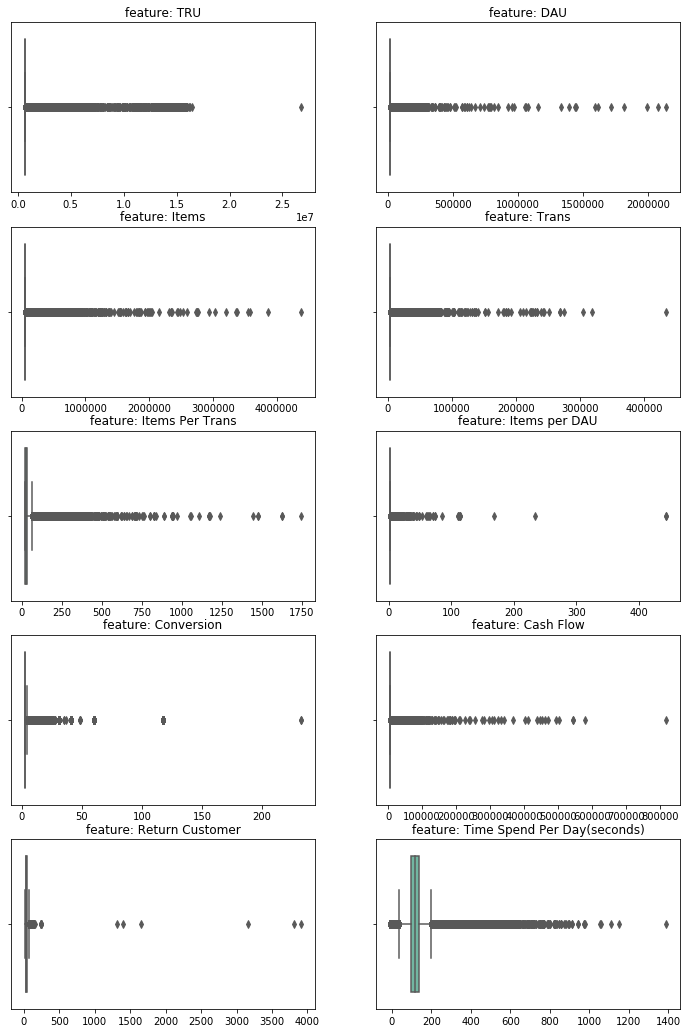

In [14]:
#box plot
#explore distribution of numerical features

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(30, 2)
for i, cn in enumerate(df.iloc[:,2:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(df[cn], orient="h", palette="Set2")
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

From the plot we can actually see that the features are quite skewed, and there are definitely some problems with them. For example, there are negative values for the time spending feature, which doesnot quite not make sense.

In [15]:
time_outlier = df[df['Time Spend Per Day(seconds)']<0]

In [16]:
df = df[df['Time Spend Per Day(seconds)']>=0]
df.shape

(386768, 13)

#### Check feature integrety

* Check if dau/tru<0 for all data;
* Check Items per DAU and Items per transcation in the dataset. 

In [17]:
#daily active user must less than total active user
print(sum(df['DAU']/df['TRU']>1))

0


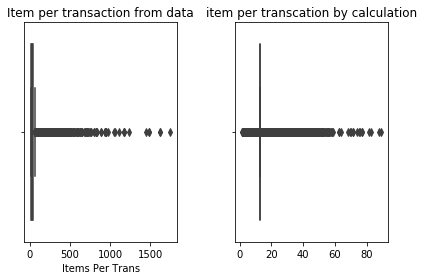

In [18]:
#Item per transaction from data
plt.subplot(1, 2, 1)
sns.boxplot(df['Items Per Trans'])
plt.title('Item per transaction from data')
#item per transcation by calculation
plt.subplot(1, 2, 2)
sns.boxplot(df['Items']/df['Trans'])
plt.title('item per transcation by calculation')
plt.tight_layout()

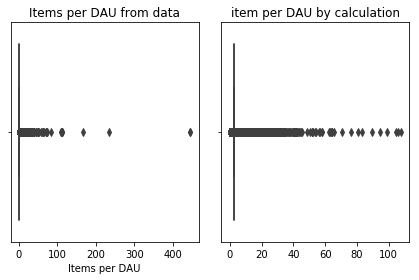

In [19]:
## Item per transaction from data
plt.subplot(1, 2, 1)
sns.boxplot(df['Items per DAU'])
plt.title('Items per DAU from data')
#item per transcation by calculation
plt.subplot(1, 2, 2)
sns.boxplot(df['Items']/df['DAU'])
plt.title('item per DAU by calculation')
plt.tight_layout()

## Step 4: Feature Engineering

Based on the findings above, we will do some features which hopefully would be helpful for model building

[[ go back to the top ]](#Table-of-contents)

In [20]:
##drop country, base on experiments, drop the country factor model would perform better in this part
detectOutlier = df.drop('Country_English',axis = 1)

## difference between provided data and self calc item per dau
detectOutlier['Item per DAU Difference'] = (detectOutlier['Items']/detectOutlier['DAU'])-detectOutlier['Items per DAU']

## difference between provided data and self calc item per trans
detectOutlier['Item per Transcation Difference'] = (detectOutlier['Items']/detectOutlier['Trans'])-detectOutlier['Items Per Trans']

## time spend per day in mins
detectOutlier['Time Spend Per Day(mins)'] = detectOutlier['Time Spend Per Day(seconds)']//60

## time spend per day in hours
detectOutlier['Time Spend Per Day(hours)'] = detectOutlier['Time Spend Per Day(mins)']//60

##date variables: month
detectOutlier['month'] = detectOutlier['Date'].dt.month

##date variables: dat of year
detectOutlier['dayofyear'] = detectOutlier['Date'].dt.dayofyear

##date variables day of week
detectOutlier['dayofweek'] = detectOutlier['Date'].dt.dayofweek

## one-hot encoding
detectOutlier = pd.get_dummies(detectOutlier, drop_first=True)

In [21]:
del detectOutlier['Date']

In [22]:
detectOutlier.shape

(386768, 19)

## Step 5: Modeling

[[ go back to the top ]](#Table-of-contents)

Here we will use isolation forest to detect outlier. Isolation forest is very robust compare to kmeans or LOF. The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Like any tree ensemble method, isolation forest is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature. In this case it will automatically do a feature engineering, and as it is a tree-based model, it is robust to different scale of feature.

Contamination is an important parameter here and I have arrived at its value based on trial and error on validating its results with outliers in 2D plot. It stands for percentage of outlier points in the data.

In [23]:
""" Use IsolationForest"""

#set variable
lendata = detectOutlier.shape[0]

# #sit normalize limited
# nmlz_a = -1
# nmlz_b = 1

# #it is not necessary for isolation forest, but we will still do it here in case we need to change to any other algorithm
# def normalize(dataset,a,b):
#     scaler = MinMaxScaler(feature_range=(a, b))
#     normalize_data = scaler.fit_transform(dataset)
#     return normalize_data

# #read dataset x,y
# x = normalize(detectOutlier, nmlz_a, nmlz_b)


ifm = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.001), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

ifm.fit(detectOutlier)

# The anomaly score of the input samples. The lower, the more abnormal
# The anomaly score of the input samples. The lower, the more abnormal.
scores_pred = ifm.decision_function(detectOutlier)
y_pred_train = ifm.predict(detectOutlier)

In [24]:
# Normal data indexs
normal = [i for i in range(len(scores_pred)) if scores_pred[i] >= 0]
# Outlier data indexs
outlier = [i for i in range(len(scores_pred)) if scores_pred[i] < 0]

print(" Number of dataset：",lendata)
print(" Number of anomal samples：",lendata - len(normal))

 Number of dataset： 386768
 Number of anomal samples： 387


## Plotting the data
* We will try to visualize the results and check if the result makes sense.

1) First we will use T-SNE
* Using a technique called T-SNE, we can reduce the dimensions of the data and create a 2D plot. 
* Based on the plot, we can see the results are quite reasonable, despite a bit conservative. We can defintely change the ratio of contamination factors base on the business need in the future.

2) Second we will use PCA
* PCA is a good tool for dimension reduction, and also can give us a good insight of the model performance

In [25]:
detectOutlier['Class'] = scores_pred

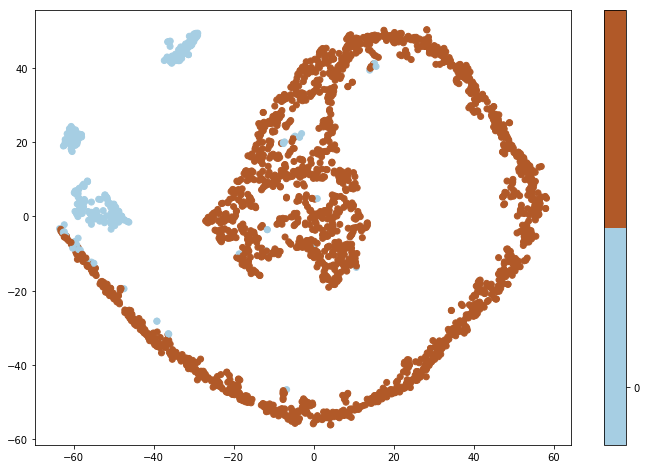

In [26]:
#Because the dataset is too large, in order to reduce running time, we will create a subsample

#sampling
df_plt=detectOutlier[detectOutlier['Class']>=0].sample(2000)
df_plt_pos=detectOutlier[detectOutlier['Class']<0].sample(200)

#create dataset
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',1)

#fit tsne
X_embedded = TSNE(n_components=2).fit_transform(X_plt)

#plot the final result
plt.figure(figsize=(12,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))
plt.colorbar(ticks=range(2))

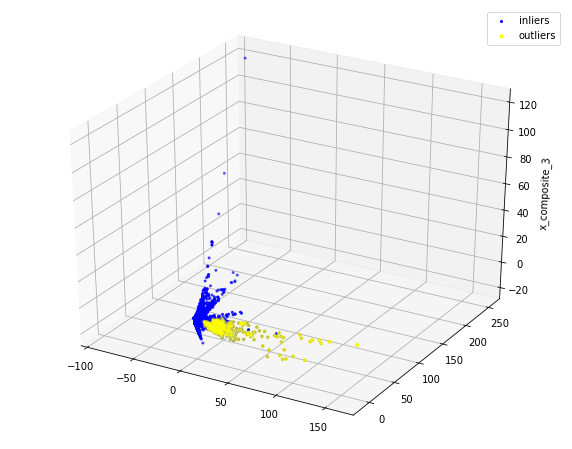

In [27]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(detectOutlier.iloc[:,:-1])
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="blue")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier,0],X_reduce[outlier,1], X_reduce[outlier,2],
           lw=2, s=4, c="yellow", label="outliers")
ax.legend()
plt.show()

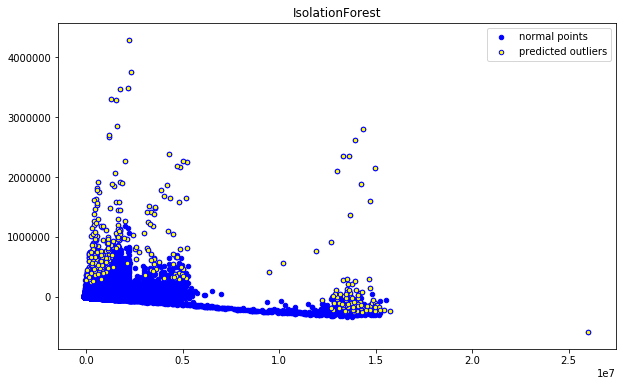

In [28]:
pca = PCA(2)
pca.fit(detectOutlier.iloc[:,:-1])
res=pd.DataFrame(pca.transform(detectOutlier.iloc[:,:-1]))
Z = np.array(res)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = ax.scatter(res[0], res[1], c='blue',
                 s=20,label="normal points")
b1 =ax.scatter(res.iloc[outlier,0],res.iloc[outlier,1], c='yellow',s=20,  edgecolor="blue",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [29]:
detected = detectOutlier.iloc[outlier,:].reset_index(drop=True)

#### Dive into results

In [30]:
print('Android(All) from outliers:', sum(detected['Platform_Android(All)']==1)/len(detected))
print('IOS(All) from outliers:', sum(detected['Platform_IOS(All)']==1)/len(detected))
print('ALL from outliers:',1-0.3769100169779287-0.2623089983022071)

Android(All) from outliers: 0.29457364341085274
IOS(All) from outliers: 0.21963824289405684
ALL from outliers: 0.3607809847198642


In [31]:
df.Platform.value_counts()/len(df.Platform)

ALL             0.336998
Android(All)    0.334185
IOS(All)        0.328817
Name: Platform, dtype: float64

In [32]:
df['Class'] = ['Normal' if x>0 else 'Outlier' for x in y_pred_train]

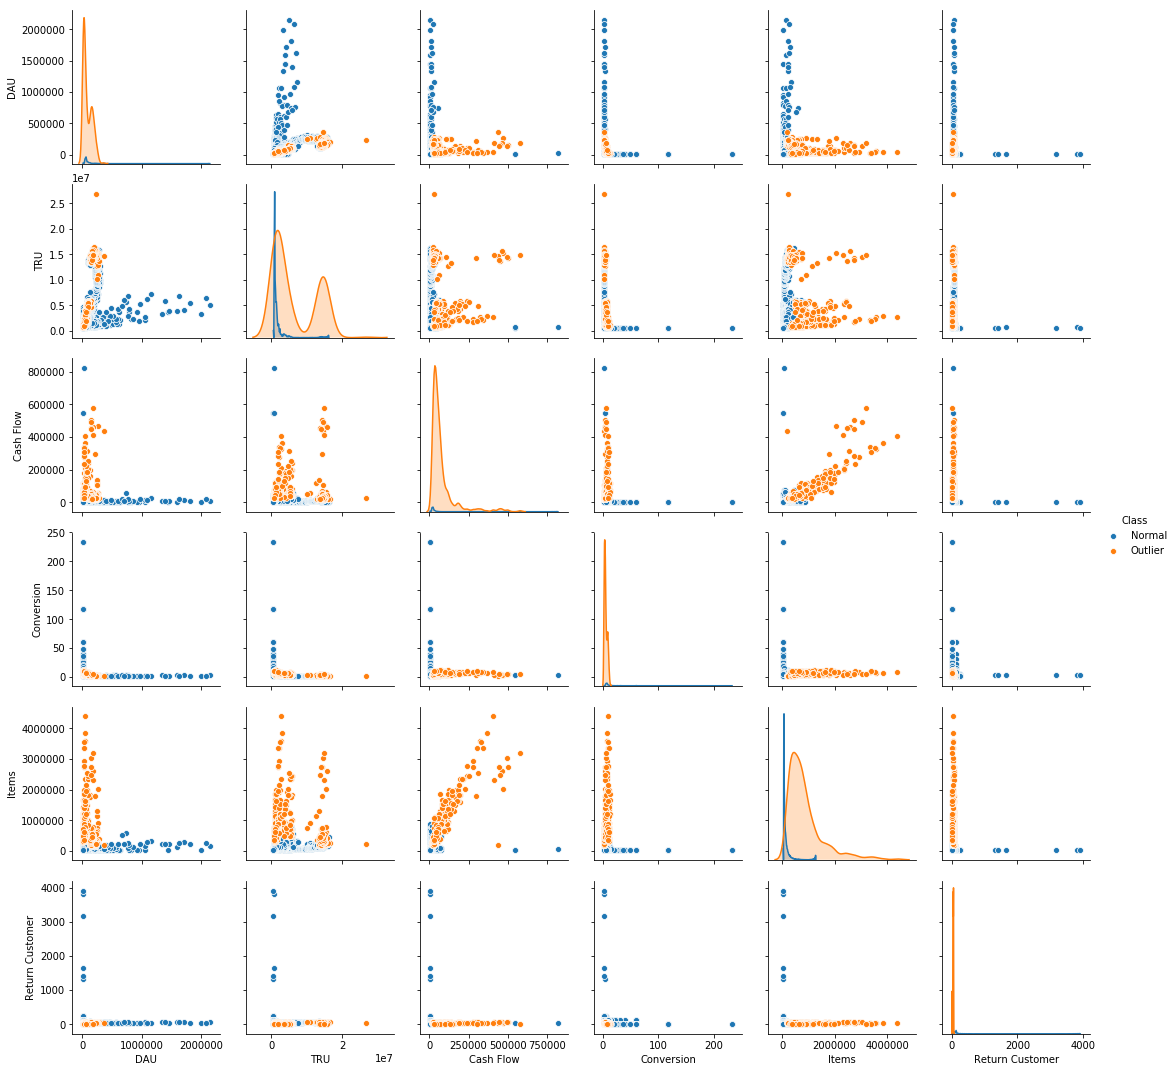

In [33]:
sns.pairplot(df[['DAU','TRU','Cash Flow','Conversion','Items','Return Customer','Class']], hue="Class")

## Step 6: Findings
[[ go back to the top ]](#Table-of-contents)

We found 519(time error)+387(modelling) in total 906 rows of outliers. 


1) Time logging error. Some of the time spend per day in the outiers are negative,which is quite abnormal as there is no possibility of spending negative amount of time at the platform. Need to communicate with engineers who are responsible for the time logging.

2) All the 'Item per transcation difference' in the dataset are negative, which means that the manually calcuated item per transcation is less than the provided dataset, some of the value differences even greater than 100. Need to communicate with someone who are responsible for the metric calculation; and further analyze if there is anything missing or calculation error from the dataset.

3) More outliers exist in 'ALL' platform, especially the outlier ratio of android and ios clients are less than that of the original dataset. We can further analyze the cilent end other than IOS and Android(like windows) to see is there any system error or bugs lead this ratio.

4) Some characteristics of outliers. From the distribution plot we can see that distribution of outliers are quite different from normal data. Charateristics of outliers:
    * Conversion or Return Customers are very low but at the same time the items bought&cash flow are quite high; 
    * DAU&TRU quite low but cashflows/items bought are suspiciously high;

## Task3 Clustering & Customer Profiling

Clustering/prediction models based on the attached dataset. 

[[ go back to the top ]](#Table-of-contents)

## Step 1: Define Problem

1) I am interested in finding how the metrics perform in different country. 

2) By grouping by data based on countries, and cluster different countries based on metrics statistics, we can further understand the customer profiling and provide business plan in localization and recommendation for customers.

[[ go back to the top ]](#Table-of-contents)

## Step 2: Checking the data

Again, we need to check data and decide what features we are going to put in our models. Based on different combination of feature selection and transformation. The clustering base on original dataset with outlier dropped has a best performance.

[[ go back to the top ]](#Table-of-contents)

In [34]:
# Get normal data
Normal_data = df.iloc[normal,:].reset_index(drop=True)

In [35]:
#drop irrelevant features
Normal_data = Normal_data.drop(['Class','Date'],axis = 1)

In [36]:
""" Categorical encoding  """
labelencoder = LabelEncoder()

# Assigning numerical values for Platform
Platform_types = Normal_data['Platform'].value_counts().keys().tolist()
Normal_data['Platform'] = labelencoder.fit_transform(Normal_data['Platform'])

#group by country
Normal_data = Normal_data.groupby(['Country_English']).mean()

## Step 3: Modeling

Here we use a simple clustering algorithm K-means. Kmeans has a lot advantages, for exmaple it scales to large data sets, a friendly time complexity and relatively easy to implement. It is definitely a good start&worthy of try for our problem.

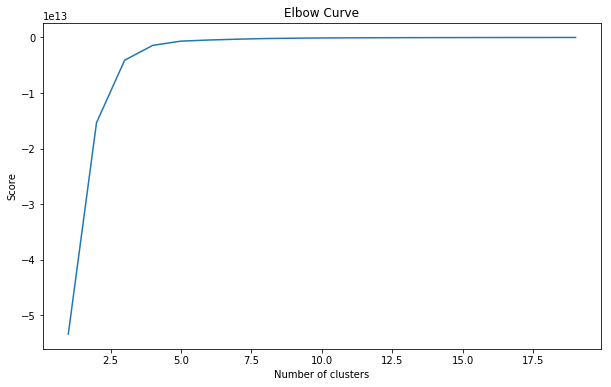

In [37]:
#apply kmeans cluster
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(Normal_data) for i in n_cluster]
scores = [kmeans[i].score(Normal_data) for i in range(len(kmeans))]

#elbow method to choose the best number of clusters
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [38]:
km = KMeans(n_clusters=5)
km.fit(Normal_data)
km.predict(Normal_data)
labels = km.labels_

#label the dataset
Normal_data['Label'] = labels

## Step 4: Results Analysis & Findings

Base on our clusters, we further analyze the results by visualize and see how our cluster method perform.

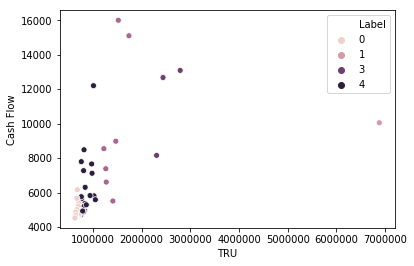

In [39]:
ax = sns.scatterplot(x='TRU', y='Cash Flow',
                     hue='Label', data=Normal_data)

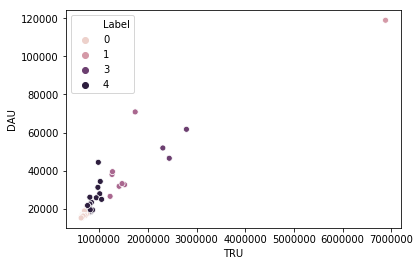

In [40]:
ax = sns.scatterplot(x='TRU', y='DAU',
                     hue='Label', data=Normal_data)

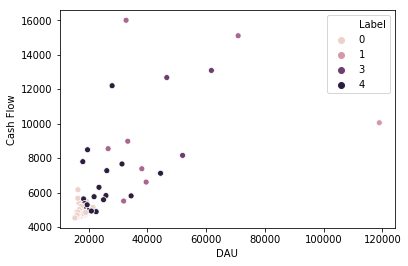

In [41]:
ax = sns.scatterplot(x='DAU', y='Cash Flow',
                     hue='Label', data=Normal_data)

Text(0.5, 0.92, 'K - Means')

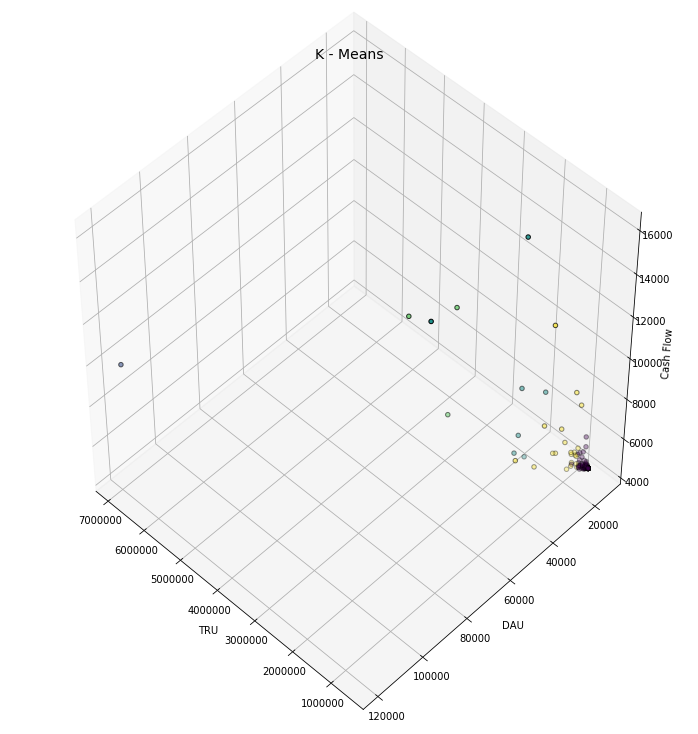

In [42]:
# Plot the distribution of data by TRU,DAU,cashflow
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(Normal_data.iloc[:,1],Normal_data.iloc[:,2],Normal_data.iloc[:,8], c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("TRU")
ax.set_ylabel("DAU")
ax.set_zlabel("Cash Flow")
plt.title("K - Means", fontsize=14)

it seems our clusters perform well under kmeans. In the 3d plot we can see that most of the data are in the cluster 0, and the other clusters has not as many countries as the 0 clusters. 
Also there is one cluster which is quite far from the others, and it is clustered on it own. As it is far from all others, we think the results actually make sense. We will step forward to analyze the results for now.

In [43]:
Normal_data = Normal_data.reset_index()

In [44]:
# Normal_data[Normal_data.Label == 0]['Country_English'].tolist()

In [45]:
Normal_data[Normal_data.Label == 1]['Country_English'].tolist()

['India']

In [46]:
Normal_data[Normal_data.Label == 2]['Country_English'].tolist()

['Egypt',
 'Korea',
 'Malaysia',
 'Russia',
 'Saudi Arabia',
 'Thailand',
 'United States']

In [47]:
Normal_data[Normal_data.Label == 3]['Country_English'].tolist()

['Indonesia', 'Iraq', 'Turkey']

In [48]:
Normal_data[Normal_data.Label == 4]['Country_English'].tolist()

['Algeria',
 'Bengal',
 'Brazil',
 'China',
 'Germany',
 'Hong Kong',
 'Israel',
 'Japan',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Mexico',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Philippines',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'Vietnam']

In [49]:
table = Normal_data.groupby(['Label']).mean()
table

,Platform,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
Label,,,,,,,,,,,
0,0.976818,6.423137e+05,15754.569009,44486.504599,3491.507501,30.356994,1.425645,2.933206,4607.224445,38.411144,123.271483
1,1.044545,6.882265e+06,118913.157624,116910.716740,14309.792382,28.967915,1.315888,2.470613,10051.075991,52.212331,126.889994
2,1.002111,1.413505e+06,38991.275808,120195.067724,8737.881852,33.664599,1.394955,3.006943,9730.882298,42.577167,112.989454
3,1.001450,2.512285e+06,53423.259789,130645.399813,12624.260014,30.795120,1.343032,2.716173,11305.210129,47.901280,138.502169
4,0.996294,8.565810e+05,23387.052588,65479.813623,4477.889621,37.828601,1.405998,2.787757,6226.661657,42.207859,122.786726


## Task5 Story Telling & Lesson Leart

#### Findings:

Base on the data and metrics of our platform. We actually see some interesting findings.

1) From our dashboard, we can see that number of DAU & TRU of ios is lower than that of Android and other platform; We can probably analyze the UI of IOS to see is there anything we can do to improve DAU and TRU.


2) Some features' values are different from aggregated data calculation. For example variables like 'Items Per Trans' and 'Items per DAU' are actually different from 'items'/'DAU' and 'items'/'Trans' directly calculated from the dataset. Most of the values are not quite divert from manual calculation, but some of the values are quite different between each other. This might because of the data aggregation error from different system or the calculation method is different. We can futher analyze or ask engineer who is responsible for the features and know more about the reason behind, which would also good for our future analysis.

#### Outlier Detection

1) Further analyze on the time logging error. And find reasons behind the negative time spending error.

2) Further analyze the cilent end other than IOS and Android(like windows). More outliers exist in 'ALL' type of platform, especially the outlier ratio of android and ios clients are less than that of the original dataset. We can further analyze what leads this ratio.

3) Further analyze why some metrics results collected are different from manually calculation based on aggregation results.

4) Some characteristics of outliers. From the distribution plot we can see that distribution of outliers are quite different from normal data. Charateristics of outliers:
    * Conversion or Return Customers are very low but at the same time the items bought&cash flow are quite high; 
    * DAU&TRU quite low but cashflows/items bought are suspiciously high;


#### Clustering Analysis

##### 1) High conversion but low revenue

    Most of countries are actually fall in this categories. Base on the clustering result and metrics analysis result, we can see the conversion in those countries is quite okay, but the cashflow is not as high, which means people use platform a lot but not ready to buy. In order to improve this situation, we can further analyze user data in these countries and develop customize results for them to simulate spending.


##### 2) High DAU&TRU but low conversion: India
   
    Improve conversion in India. We can see the greatest customer base actually locate within India. It has the most total registered user and the most daily active user. However, the conversion rate are less than the other countries, only 2.46%. I would recommend put more effort in india user data, and see why the conversion is less than the other countries.


##### 3) Customer spend less time & high conversion&revenue: Egypt, Korea, Malaysia, Russia, Saudi Arabia, Thailand and United States

    We can Niche marketing in Egypt, Korea, Malaysia, Russia, Saudi Arabia, Thailand and United States. For customers in these countries, although they spend less time in the platform, their conversion rate is out-performed based on the clustering result. Therefore, from a business growing perspective, there are a lot of room for growing the customers there as the DAU and TRU are the lowest compared to the other countries. In the future we can put more effort in niche marketing at those countries, grow our customer base and further improve revenue.


##### 4) Spend most and stay longest in platform: Indonesia, Iraq, Turkey

    Expand userbase& develop recommendation engine in Indonesia, Iraq, Turkey. For customers in these countries, they like our platform a lot. In the future, we can further explore the preferences of customers in these countries and personalize recommendations to further improve & maximize our revenue and expand customer base in these countries.



## Future work
1) There are a lot to improve in the anomaly detection part. For example we can dive deeper into the features to see what else we missed. For example we can calculate the customer retention ratio from different platform, explore more conversion rated features to improve anomaly detection capability; also try to use different models and further fine tune the prameters to get a more accurate results.

2) For clustering part, we can use different cluster methods and different features to see if there are any other insigts we missed. For example density based clustering and hierachy clustering. Other than that we can also see is there any seasonality effect in this dataset, so that we can further niche marketing and develop different strategies for different countries.

[[ go back to the top ]](#Table-of-contents)